# Spaceship Titanic

## Loading the data

In [260]:
import numpy as np
import pandas as pd

In [261]:
train = pd.read_csv("~/DataspellProjects/dsProject/Kaggle-competitions/Spaceship Titanic/data/train.csv")
test = pd.read_csv("~/DataspellProjects/dsProject/Kaggle-competitions/Spaceship Titanic/data/test.csv")

In [262]:
train.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [263]:
test.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [265]:
# Numerical columns
num_cols = [
    "Age",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
]

# Categorical columns
cat_cols = [
    "HomePlanet",
    "CryoSleep",
    "Destination",
    "VIP",
]

# Qualitative columns
qual_cols = [
    "PassengerId",
    "Cabin",
    "Name",
]

feature_cols = num_cols + cat_cols + qual_cols
target_col = "Transported"

## EDA (Exploratory Data Analysis)

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

### Target distribution

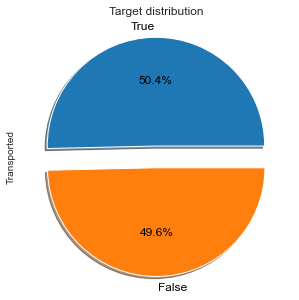

In [267]:
plt.figure(figsize=(5, 5))
train[target_col].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.1f%%", shadow=True,
textprops={"fontsize": 12, "color": "black"}).set_title("Target distribution");

From the plot above we can see that the target variable is highly balanced.

### Numerical features analysis

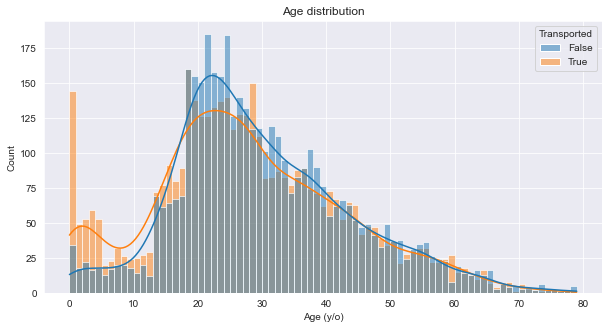

In [268]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x="Age", hue=target_col, binwidth=1, kde=True)
plt.title("Age distribution")
plt.xlabel("Age (y/o)");

+ 0-18 y/o passengers more likely to be transported than not.
+ 18-25 y/o passengers less likely to be transported than not.
+ Over 25 y/o people are about equally likely to be transported than not.

Let's create new features that will divide our passangers into age groups. But before this we should analyze features where passengers have spent some money. These features are: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`.

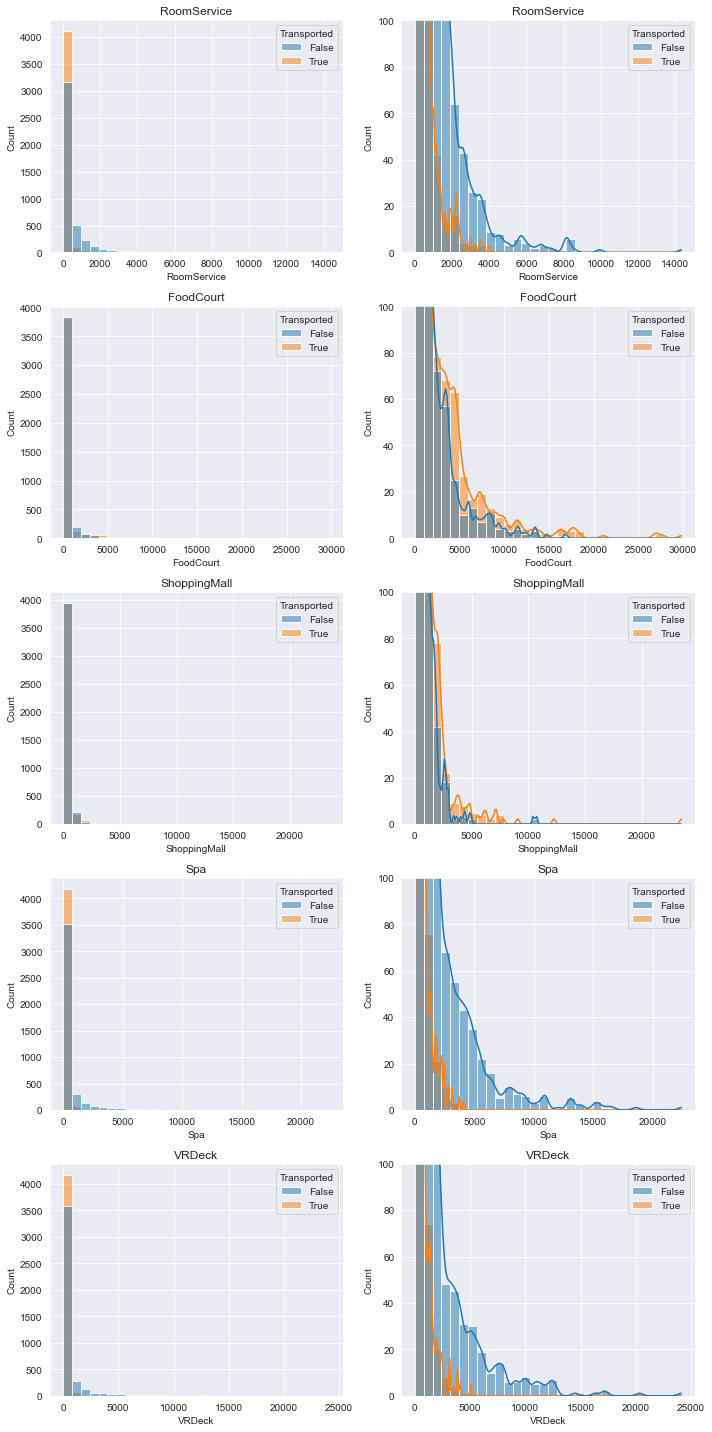

In [269]:
amenities = num_cols[1:]

fig = plt.figure(figsize=(10, 20))
for i, var_name in enumerate(amenities):
    # Left plot
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue=target_col)
    ax.set_title(var_name)

    # Right plot
    ax = fig.add_subplot(5, 2, 2 * i + 2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue=target_col)
    plt.ylim([0, 100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

**Conclusions**:
+ The distribution of spending decays *exponentially* (compare exponential plot below and right plots).


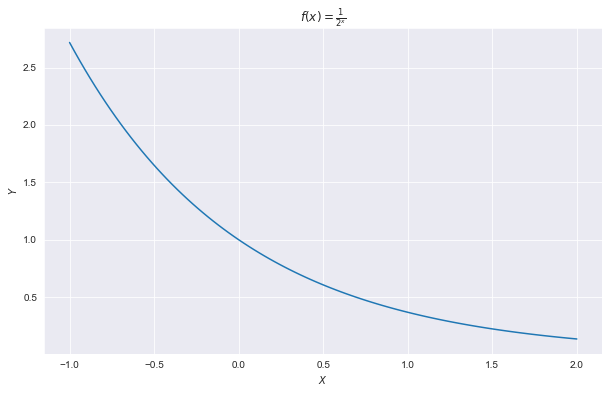

In [270]:
x = np.linspace(-1, 2, 100)
y = 1 / np.exp(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title(r"$f(x) = \frac{1}{2^x}$")
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

+ There are a small number of outliers.
+ Passengers who were transported tended to spent less.
+ `RoomService`, `Spa` and `VRDeck` (first group) have different distributions to `FoodCourt` and `ShoppingMall` (second group). Therefore, we can assume that first group could be interpreted as **luxury amenities**, and second group as **essential amenities**.

**To do**:
+ Create a new feature that tracks total expenditure across all 5 features.
+ Create a binary feature that indicates if the person has any expenditures. That is person with no expenditures has 0.
+ Take the log transform to reduce skew.

### Categorical features analysis

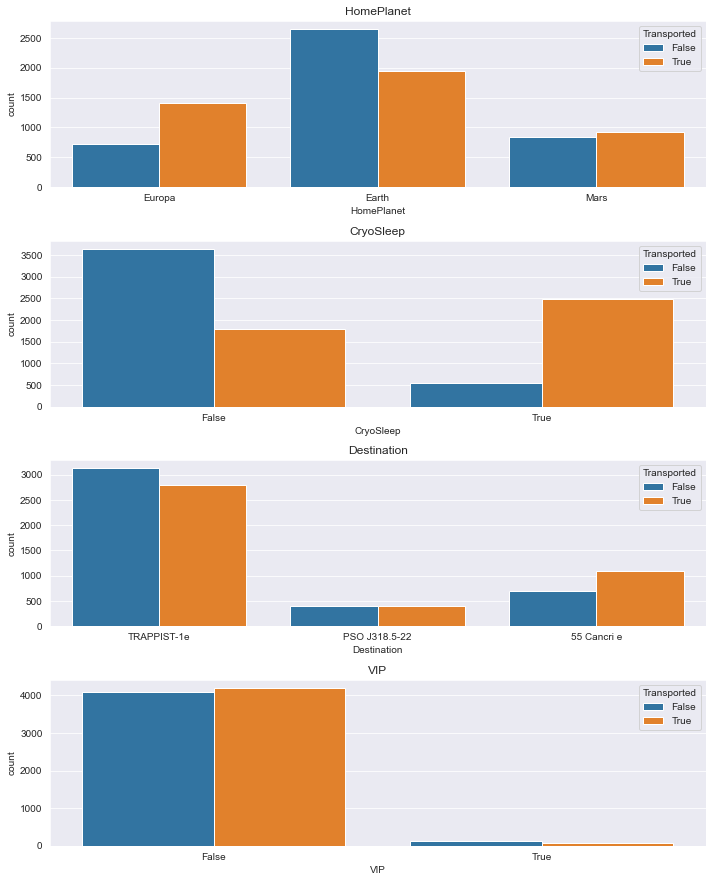

In [271]:
fig = plt.figure(figsize=(10, 15))

for i, var_name in enumerate(cat_cols):
    ax = fig.add_subplot(5, 1, i + 1)
    sns.countplot(data=train, x=var_name, axes=ax, hue=target_col)
    ax.set_title(var_name)

fig.tight_layout()
plt.show()

**Conclusions**:
+ `HomePlanet`. From Europa twice as many passengers were transported than were not. From Earth more people weren't transported. From Mars people were equally transported and weren't, same as from Unknown planet.
+ `CryoSleep` seems to be very useful feature. Cryosleep significantly increase the chance to be transported.
+ `Destination`. Types of destinations seems to be balanced according to `Transported` feature. I don't think it shall make any large impact.
+ `VIP`. Passengers who had not VIP equally likely to be transported and not to be transported. Nevertheless, people with VIP are in the same situation. I tnink we shall drop this column to prevent overfitting.

**To do**:
+ Drop `VIP` column to prevent overfitting.

### Qualitative features analysis

Before any visualization we need to transform qualitative features.

In [272]:
train[qual_cols].head(n=5)

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


**Conclusions**:
+ `PassengerId` takes the form *gggg_pp* where *gggg* indicates a group the passenger is travelling with an *pp* is their number within the group.
+ `Cabin` takes the form *deck/num/side*, where *side* can be either *P* for *Port* or *S* for *Starboard*.

**To do**:
+ Extract the group and group size from the `PassengerId` feature.
+ Extract the deck, number and side from `Cabin` feature.
+ Extract surname from the `Name` feature to identify family.

## Feature engineering

### Numerical features engineering

Let's split `Age` feature into groups.

In [273]:
train["Age_group"] = np.nan
train.loc[train["Age"] < 13, "Age_group"] = "Age_0-12"
train.loc[(train["Age"] >= 13) & (train["Age"] <= 17), "Age_group"] = "Age_13-17"
train.loc[(train["Age"] >= 18) & (train["Age"] <= 25), "Age_group"] = "Age_18-25"
train.loc[(train["Age"] >= 26) & (train["Age"] <= 30), "Age_group"] = "Age_26-30"
train.loc[(train["Age"] >= 31) & (train["Age"] <= 50), "Age_group"] = "Age_31-50"
train.loc[(train["Age"]) >= 51, "Age_group"] = "Age_51+"

test["Age_group"] = np.nan
test.loc[test["Age"] < 13, "Age_group"] = "Age_0-12"
test.loc[(test["Age"] >= 13) & (test["Age"] <= 17), "Age_group"] = "Age_13-17"
test.loc[(test["Age"] >= 18) & (test["Age"] <= 25), "Age_group"] = "Age_18-25"
test.loc[(test["Age"] >= 26) & (test["Age"] <= 30), "Age_group"] = "Age_26-30"
test.loc[(test["Age"] >= 31) & (test["Age"] <= 50), "Age_group"] = "Age_31-50"
test.loc[(test["Age"]) >= 51, "Age_group"] = "Age_51+"

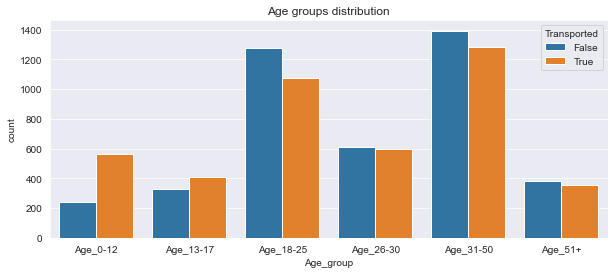

In [274]:
age_order = ["Age_0-12", "Age_13-17", "Age_18-25", "Age_26-30", "Age_31-50", "Age_51+"]

plt.figure(figsize=(10, 4))

sns.countplot(data=train, x="Age_group", hue=target_col, order=age_order)
plt.title("Age groups distribution");

Let's calculate total expenditure and identify passengers with no expenditure.


In [275]:
train["Expenditure"] = train[amenities].sum(axis=1)
train["No_spending"] = (train["Expenditure"] == 0).astype(int)

test["Expenditure"] = test[amenities].sum(axis=1)
test["No_spending"] = (test["Expenditure"] == 0).astype(int)

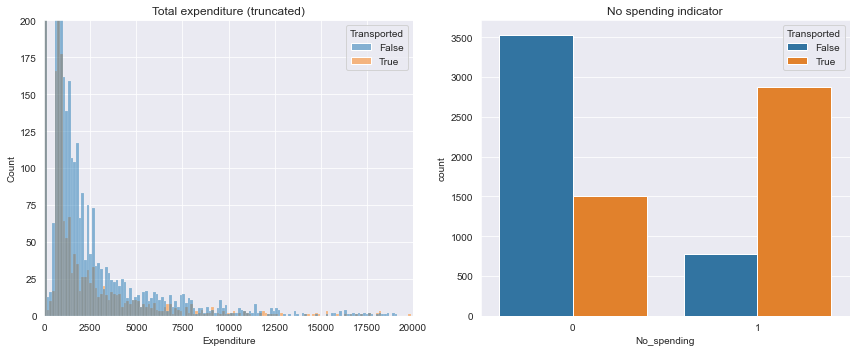

In [276]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x="Expenditure", hue=target_col, bins=250)
plt.title("Total expenditure (truncated)")
plt.ylim([0, 200])
plt.xlim([0, 20000])

plt.subplot(1, 2, 2)
sns.countplot(data=train, x="No_spending", hue=target_col)
plt.title("No spending indicator")
fig.tight_layout()

**Reminder**: take the log transform to reduce skew!

### Categorical features engineering

**Reminder**: drop the `VIP` column.

### Qualitative features engineering

Extract passenger group and group size from `PassengerId`.

In [277]:
train["Group"] = train["PassengerId"].apply(lambda x: x.split("_")[0]).astype(int)
test["Group"] = test["PassengerId"].apply(lambda x: x.split("_")[0]).astype(int)

train["Group_size"] = train["Group"].map(lambda x: pd.concat([train["Group"], test["Group"]]).value_counts()[x])  # Test later without pd.concat()
test["Group_size"] = test["Group"].map(lambda x: pd.concat([train["Group"], test["Group"]]).value_counts()[x])

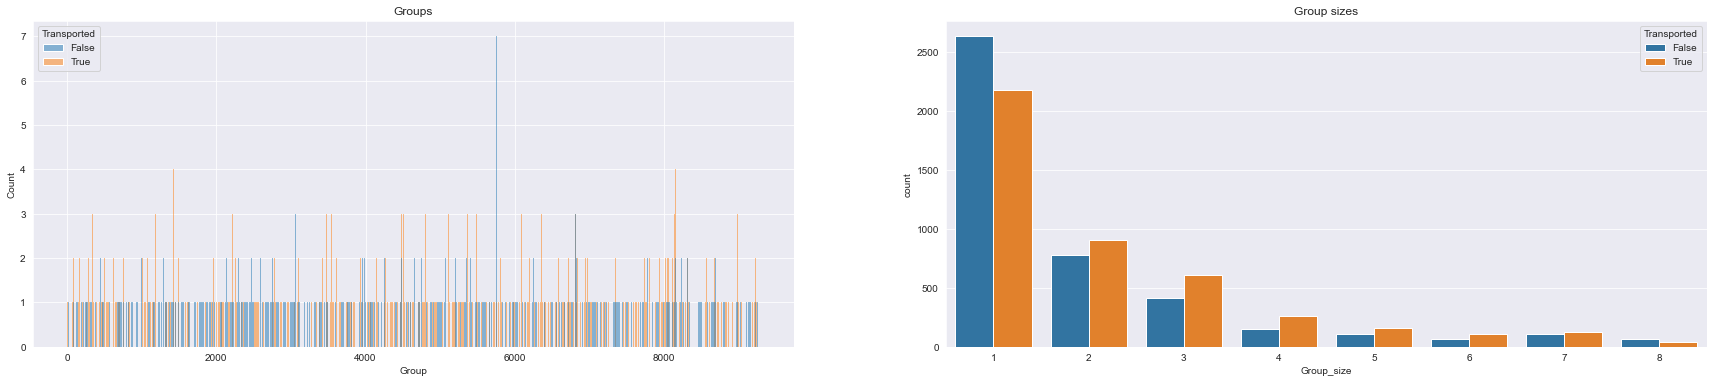

In [278]:
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x="Group", hue=target_col, binwidth=1)
plt.title("Groups")

plt.subplot(1, 2, 2)
sns.countplot(data=train, x="Group_size", hue=target_col)
plt.title("Group sizes");

In [279]:
print("Cardinality of Group features is", len(pd.unique(train["Group"])))

Cardinality of Group features is 6217


We cannot use the `Group` feature in our model because it has too big of a cardinality, and would explode the number of dimensions with one-hot encoding.
The `Group_size` feature should be useful. According to the right plot we can say that alone passengers less likely to be transported. Therefore let's create a new binary `Solo` feature that tracks whether someone is travelling on their own or not.

In [280]:
train["Solo"] = (train["Group_size"] == 1).astype(int)
test["Solo"] = (test["Group_size"] == 1).astype(int)

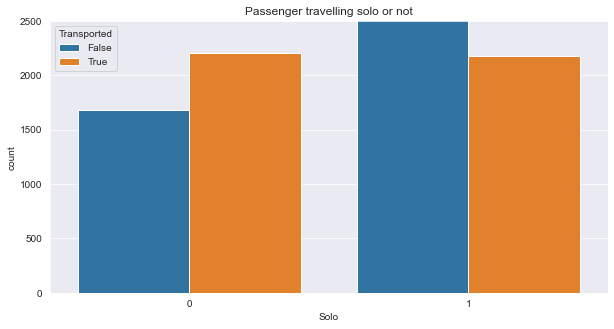

In [281]:
plt.figure(figsize=(10, 5))

sns.countplot(data=train, x="Solo", hue=target_col)
plt.title("Passenger travelling solo or not")
plt.ylim([0, 2500]);

Let's extract deck, number and side from `Cabin` feature.

In [282]:
train["Cabin"].head(n=5)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [283]:
# Replacing NaN's with outliers for now (so we can split feature).
train["Cabin"].fillna("Z/999/Z", inplace=True)
test["Cabin"].fillna("Z/999/Z", inplace=True)

train["Cabin_deck"] = train["Cabin"].apply(lambda x: x.split("/")[0])
train["Cabin_number"] = train["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
train["Cabin_side"] = train["Cabin"].apply(lambda x: x.split("/")[2])

test["Cabin_deck"] = test["Cabin"].apply(lambda x: x.split("/")[0])
test["Cabin_number"] = test["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
test["Cabin_side"] = test["Cabin"].apply(lambda x: x.split("/")[2])

# Putting NaN's back in (will be filling later).
train.loc[train["Cabin_deck"] == "Z", "Cabin_deck"] = np.nan
train.loc[train["Cabin_number"] == 999, "Cabin_number"] = np.nan
train.loc[train["Cabin_side"] == "Z", "Cabin_side"] = np.nan

test.loc[test["Cabin_deck"] == "Z", "Cabin_deck"] = np.nan
test.loc[test["Cabin_number"] == 999, "Cabin_number"] = np.nan
test.loc[test["Cabin_side"] == "Z", "Cabin_side"] = np.nan

# We don't need Cabin feature anymore, so I am dropping it.
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

In [284]:
# Testing a method to highlight the output.
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [285]:
print(f"Types of decks: {pd.unique(train['Cabin_deck'])}")
print("Min value of cabin number is {}{}{} and max value is {}{}{}".format(color.RED, min(train["Cabin_number"]), color.END, color.RED, max(train["Cabin_number"]), color.END))

Types of decks: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Min value of cabin number is 0.0 and max value is 1894.0


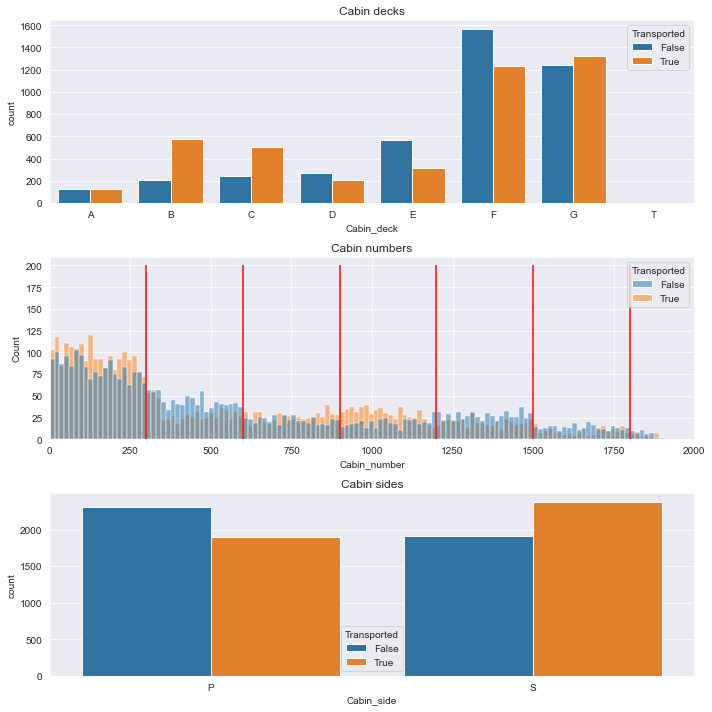

In [286]:
deck_order = ["A", "B", "C", "D", "E", "F", "G", "T"]
fig = plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.countplot(data=train, x="Cabin_deck", hue=target_col, order=deck_order)
plt.title("Cabin decks")

plt.subplot(3, 1, 2)
sns.histplot(data=train, x="Cabin_number", hue=target_col, binwidth=15)
for i in range(300, 2100, 300):
    plt.vlines(i, ymin=0, ymax=200, color="red")
plt.title("Cabin numbers")
plt.xlim([0, 2000])

plt.subplot(3, 1, 3)
sns.countplot(data=train, x="Cabin_side", hue=target_col)
plt.title("Cabin sides")
fig.tight_layout()

In [287]:
print("Number of passengers into T deck:", sum(train["Cabin_deck"] == "T"))

Number of passengers into T deck: 5


From plots above we see that `Cabin_number` can be divided into chunks of 300 cabins each. Let's compress this feature into categorical one, which indicates which chunk each passenger in. Also, there is *T* deck, that seems to be an outlier.

In [288]:
def add_cabin_region(data: pd.DataFrame) -> None:
    data["Cabin_region1"] = (data["Cabin_number"] < 300).astype(int)
    data["Cabin_region2"] = ((data["Cabin_number"] >= 300) & (data["Cabin_number"] < 600)).astype(int)
    data["Cabin_region3"] = ((data["Cabin_number"] >= 600) & (data["Cabin_number"] < 900)).astype(int)
    data["Cabin_region4"] = ((data["Cabin_number"] >= 900) & (data["Cabin_number"] < 1200)).astype(int)
    data["Cabin_region5"] = ((data["Cabin_number"] >= 1200) & (data["Cabin_number"] < 1500)).astype(int)
    data["Cabin_region6"] = ((data["Cabin_number"] >= 1500) & (data["Cabin_number"] < 1800)).astype(int)
    data["Cabin_region7"] = (data["Cabin_number"] >= 1800).astype(int)

In [289]:
# One-hot encoding
add_cabin_region(train)
add_cabin_region(test)

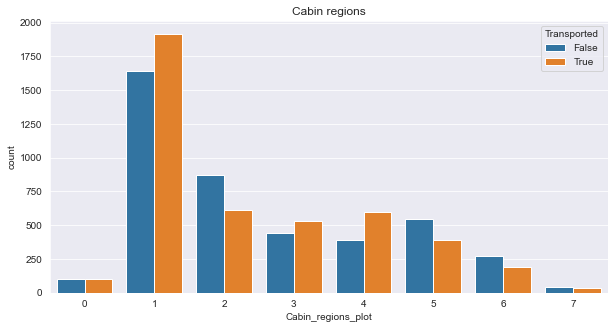

In [290]:
train["Cabin_regions_plot"] = (train["Cabin_region1"] + 2 * train["Cabin_region2"] + 3 * train["Cabin_region3"] + 4 * train["Cabin_region4"] + 5 * train["Cabin_region5"] + 6 * train["Cabin_region6"] + 7 * train["Cabin_region7"]).astype(int)

plt.figure(figsize=(10, 5))
sns.countplot(data=train, x="Cabin_regions_plot", hue=target_col)
plt.title("Cabin regions")
train.drop("Cabin_regions_plot", axis=1, inplace=True)

Let's create a new `Surname` feature and calculate family size from last name.

In [291]:
# Replacing NaN's with outliers, so we can split the feature.
train["Name"].fillna("Unknown Unknown", inplace=True)
test["Name"].fillna("Unknown Unknown", inplace=True)

train["Surname"] = train["Name"].str.split().str[-1]
test["Surname"] = test["Name"].str.split().str[-1]

train["Family_size"] = train["Surname"].map(lambda x: pd.concat([train["Surname"], test["Surname"]]).value_counts()[x])
test["Family_size"] = test["Surname"].map(lambda x: pd.concat([train["Surname"], test["Surname"]]).value_counts()[x])

# Putting NaN's back in (they will be filled later).
train.loc[train["Surname"] == "Unknown", "Surname"] = np.nan
test.loc[test["Surname"] == "Unknown", "Surname"] = np.nan

# Filling all unknown families with NaN's.
train.loc[train["Family_size"] > 100, "Family_size"] = np.nan
test.loc[test["Family_size"] > 100, "Family_size"] = np.nan

# We don't need the `Name` feature, so we can drop it.
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

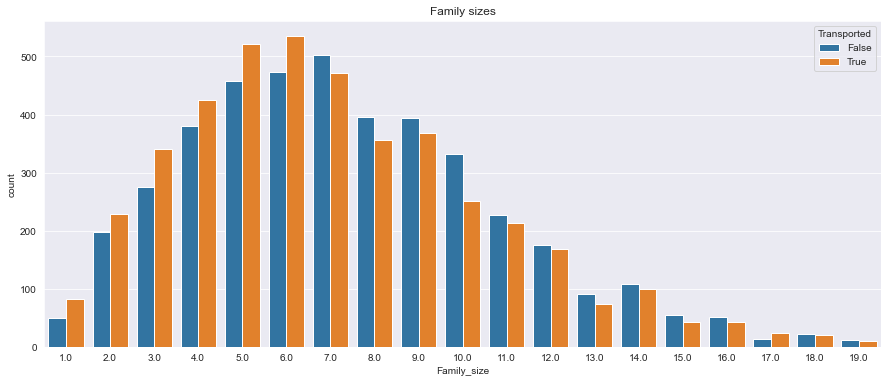

In [292]:
plt.figure(figsize=(15, 6))

sns.countplot(data=train, x="Family_size", hue=target_col)
plt.title("Family sizes");

## Working with missing values

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

Let's combine train and test samples to fill missing values. They will be splitted back later.

In [294]:
y = train[target_col].copy().astype(int)
X = train.drop(target_col, axis=1).copy()

data = pd.concat([X, test], axis=0).reset_index(drop=True)

In [295]:
na_cols = data.columns[data.isna().any()].tolist()  # Aggregating all features with missing values.

missing_values = pd.DataFrame(data[na_cols].isna().sum(), columns=["Number_missing"])
missing_values["Percentage_missing"] = np.round(100 * missing_values["Number_missing"] / len(data), 2)
missing_values["Percentage_missing"] = missing_values['Percentage_missing'].astype(str) + " %"
missing_values

,Number_missing,Percentage_missing
HomePlanet,288,2.22 %
CryoSleep,310,2.39 %
Destination,274,2.11 %
Age,270,2.08 %
VIP,296,2.28 %
RoomService,263,2.03 %
FoodCourt,289,2.23 %
ShoppingMall,306,2.36 %
Spa,284,2.19 %
VRDeck,268,2.07 %


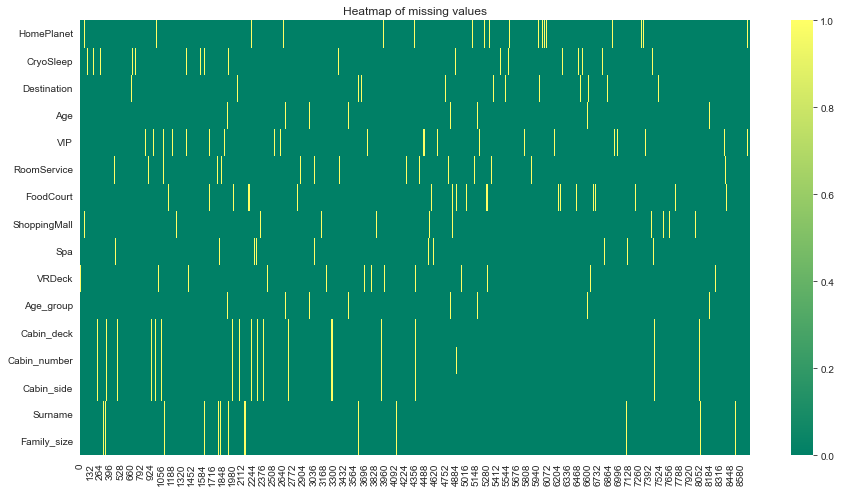

In [296]:
plt.figure(figsize=(15, 8))
sns.heatmap(train[na_cols].isna().T, cmap="summer")
plt.title("Heatmap of missing values");

Let's closer inspect all features.

`HomePlanet` and `Group` features.

In [297]:
# Joint distribution of HomePlanet and Group.
ghp = data.groupby(["Group", "HomePlanet"])["HomePlanet"].size().unstack().fillna(0)
ghp.head(n=5)

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


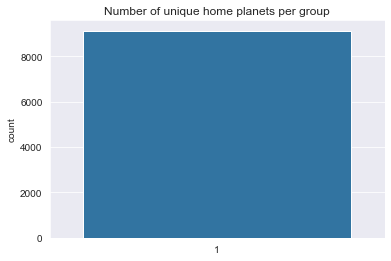

In [298]:
sns.countplot(x=(ghp > 0).sum(axis=1))
plt.title("Number of unique home planets per group");

From the figure above we can see, that everyone in the same group comes from the same home planet. So, we can fill the missing `HomePlanet` values according to the group.

In [299]:
# Missing values in HomePlanet feature before.
hp_before = data["HomePlanet"].isna().sum()

# Passengers with missing home planet and in a group with known home planet.
ghp_index = data[data["HomePlanet"].isna()][(data[data["HomePlanet"].isna()]["Group"]).isin(ghp.index)].index

# Filling corresponding missing values.
data.loc[ghp_index, "HomePlanet"] = data.iloc[ghp_index, :]["Group"].map(lambda x: ghp.idxmax(axis=1)[x])

print("HomePlanet missing values before:", hp_before)
print("HomePlanet missing values after:", data["HomePlanet"].isna().sum())

HomePlanet missing values before: 288
HomePlanet missing values after: 157


`HomePlanet` and `CabinDeck` features.

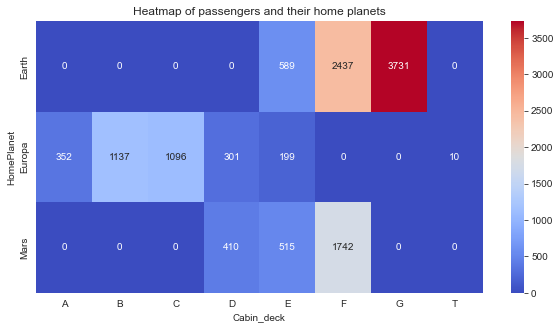

In [300]:
# Joint distribution of Cabin_deck and HomePlanet.
cdhp = data.groupby(["Cabin_deck", "HomePlanet"])["HomePlanet"].size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
sns.heatmap(cdhp.T, annot=True, fmt="g", cmap="coolwarm")
plt.title("Heatmap of passengers and their home planets");

**Insights**:
+ Passengers on decks *A*, *B*, *C* and *T* from Europa planet.
+ Passengers on decks *D*, *E*, *F* came from multiple planets.
+ Passengers on deck *G* came from Earth.

In [301]:
# Missing values before.
hp_before = data["HomePlanet"].isna().sum()

# Passengers on decks A, B, C and T came from Europa.
data.loc[(data["HomePlanet"].isna()) & (data["Cabin_deck"].isin(["A", "B", "C", "T"])), "HomePlanet"] = "Europa"

# Passengers on deck G came from Earth planets.
data.loc[(data["HomePlanet"].isna()) & (data["Cabin_deck"] == "G"), "HomePlanet"] = "Earth"

print("HomePlanet missing values before:", hp_before)
print("HomePlanet missing values after:", data["HomePlanet"].isna().sum())

HomePlanet missing values before: 157
HomePlanet missing values after: 94


`HomePlanet` and `Surname` features.

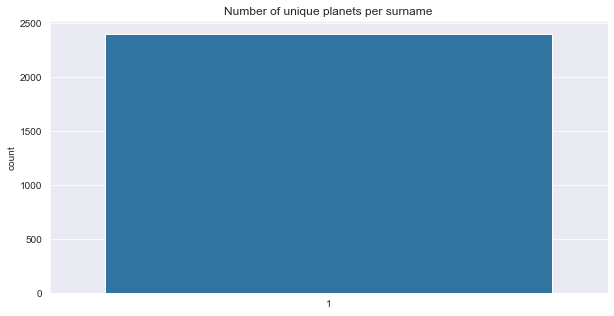

In [302]:
# Joint distribution of Surname and HomePlanet
shp = data.groupby(["Surname", "HomePlanet"])["HomePlanet"].size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
sns.countplot(x=(shp > 0).sum(axis=1))
plt.title("Number of unique planets per surname");

Everyone with the same surname comes from the same home planet.

In [303]:
# Missing values before.
hp_before = data["HomePlanet"].isna().sum()

# Passengers with missing home planet and in a family with known home planet.
shp_index = data[data["HomePlanet"].isna()][(data[data["HomePlanet"].isna()]["Surname"]).isin(shp.index)].index

# Filling missing values.
data.loc[shp_index, "HomePlanet"] = data.iloc[shp_index, :]["Surname"].map(lambda x: shp.idxmax(axis=1)[x])

print("HomePlanet missing values before:", hp_before)
print("HomePlanet missing values after:", data["HomePlanet"].isna().sum())

HomePlanet missing values before: 94
HomePlanet missing values after: 10


Let's look at the left 10 missing values.

In [304]:
data[data["HomePlanet"].isna()][["PassengerId", "HomePlanet", "Destination"]]

,PassengerId,HomePlanet,Destination
2274,2443_01,NaN,TRAPPIST-1e
2631,2817_01,NaN,TRAPPIST-1e
3091,3331_01,NaN,TRAPPIST-1e
4548,4840_01,NaN,TRAPPIST-1e
5762,6108_01,NaN,TRAPPIST-1e
8969,0616_01,NaN,TRAPPIST-1e
10583,4052_01,NaN,TRAPPIST-1e
11913,7065_01,NaN,TRAPPIST-1e
12551,8435_01,NaN,TRAPPIST-1e
12725,8775_01,NaN,TRAPPIST-1e


`HomePlanet` and `Destination` features.

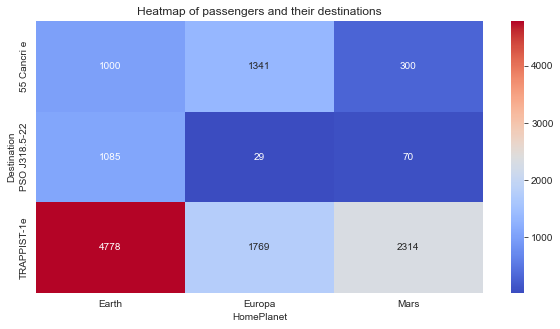

In [305]:
# Joint distribution of HomePlanet and Destination
hpd = data.groupby(["HomePlanet", "Destination"])["Destination"].size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
sns.heatmap(hpd.T, annot=True, fmt="g", cmap="coolwarm")
plt.title("Heatmap of passengers and their destinations");

Most people heading towards *TRAPPIST-1e* came from Earth, so it makes sense to guess they came from there. Recall, that no one on deck *D* came from Earth, so we need to filter these out.

In [306]:
# Missing values before.
hp_before = data["HomePlanet"].isna().sum()

# Filling remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on deck D).
data.loc[(data["HomePlanet"].isna()) & ~(data["Cabin_deck"] == "D"), "HomePlanet"] = "Earth"
data.loc[(data["HomePlanet"].isna()) & (data["Cabin_deck"] == "D"), "HomePlanet"] = "Mars"

print("HomePlanet missing values before:", hp_before)
print("HomePlanet missing values after:", data["HomePlanet"].isna().sum())

HomePlanet missing values before: 10
HomePlanet missing values after: 0


`Destination` feature.

In [307]:
# Missing values before.
d_before = data["Destination"].isna().sum()

# Filling missing Destination values with mode.
data.loc[(data["Destination"].isna()), "Destination"] = "TRAPPIST-1e"

print("Destination missing values before:", d_before)
print("Destination missing values after:", data["Destination"].isna().sum())

Destination missing values before: 274
Destination missing values after: 0


`Surname` and `Group` features.

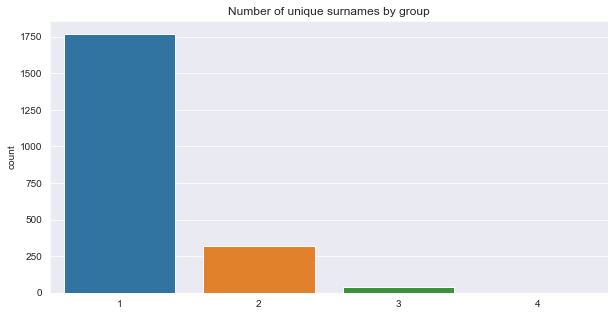

In [308]:
# Joint distribution of Group and Surname.
gsn = data[data["Group_size"] > 1].groupby(["Group", "Surname"])["Surname"].size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
sns.countplot(x=(gsn > 0).sum(axis=1))
plt.title("Number of unique surnames by group");

The majority of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.

In [309]:
# Missing values before.
sn_before = data["Surname"].isna().sum()

# Passengers with missing Surname and in a group with known majority Surname.
gsn_index = data[data["Surname"].isna()][(data[data["Surname"].isna()]["Group"]).isin(gsn.index)].index

# Filling corresponding missing values.
data.loc[gsn_index, "Surname"] = data.iloc[gsn_index, :]["Group"].map(lambda x: gsn.idxmax(axis=1)[x])

print("Surname missing values before:", sn_before)
print("Surname missing values after:", data["Surname"].isna().sum())

Surname missing values before: 294
Surname missing values after: 155


In [310]:
# Replacing NaN's with outliers (so we can use map).
data["Surname"].fillna("Unknown", inplace=True)

# Updating family size feature.
data["Family_size"] = data["Surname"].map(lambda x: data["Surname"].value_counts()[x])

# Putting NaN's back in place of outliers.
data.loc[data["Surname"] == "Unknown", "Surname"] = np.nan

# Unknown surname means no family.
data.loc[data["Family_size"] > 100, "Family_size"] = 0

`Cabin_...` (deck, side and number) and `Group` features.

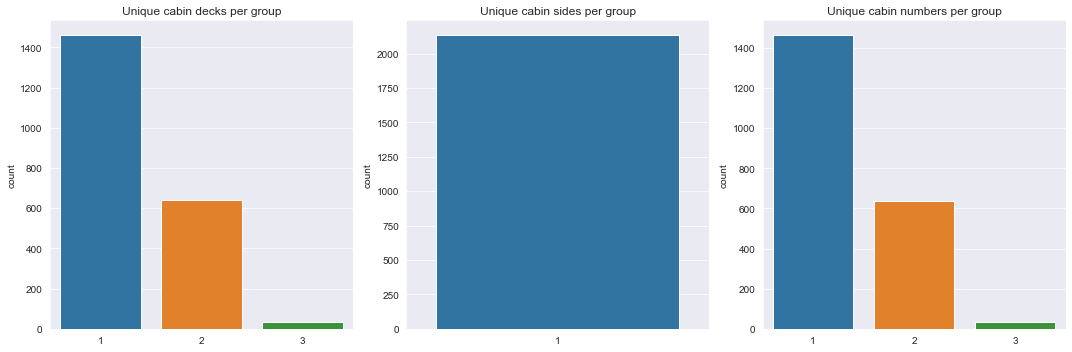

In [311]:
# Joint distribution of Group and Cabin (side, features.
gcd = data[data["Group_size"] > 1].groupby(["Group", "Cabin_deck"])["Cabin_deck"].size().unstack().fillna(0)
gcs = data[data["Group_size"] > 1].groupby(["Group", "Cabin_side"])["Cabin_side"].size().unstack().fillna(0)
gcn = data[data["Group_size"] > 1].groupby(["Group", "Cabin_number"])["Cabin_number"].size().unstack().fillna(0)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=(gcd > 0).sum(axis=1))
plt.title("Unique cabin decks per group")

plt.subplot(1, 3, 2)
sns.countplot(x=(gcs > 0).sum(axis=1))
plt.title("Unique cabin sides per group")

plt.subplot(1, 3, 3)
sns.countplot(x=(gcn > 0).sum(axis=1))
plt.title("Unique cabin numbers per group")
fig.tight_layout()

In [312]:
# Missing values before.
cs_before = data["Cabin_side"].isna().sum()

# Passengers with missing Cabin_side and in a group with known Cabin_side.
gcs_index = data[data["Cabin_side"].isna()][(data[data["Cabin_side"].isna()]["Group"]).isin(gcs.index)].index

# Filling corresponding missing values.
data.loc[gcs_index, "Cabin_side"] = data.iloc[gcs_index, :]["Group"].map(lambda x: gcs.idxmax(axis=1)[x])

print("Cabin_side missing values before:", cs_before)
print("Cabin_side missing values after:", data["Cabin_side"].isna().sum())

Cabin_side missing values before: 299
Cabin_side missing values after: 162


`Cabin_side` and `Surname` features.

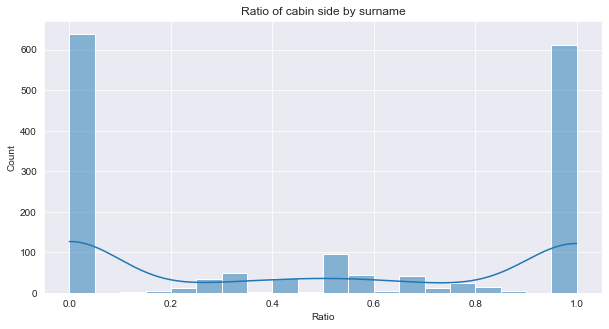

In [313]:
# Joint distribution of Surname and Cabin_side.
scs = data[data["Group_size"] > 1].groupby(["Surname", "Cabin_side"])["Cabin_side"].size().unstack().fillna(0)

# Ratio of sides.
scs["Ratio"] = scs["P"] / (scs["P"] + scs["S"])

plt.figure(figsize=(10, 5))
sns.histplot(scs["Ratio"], kde=True, binwidth=0.05)
plt.title("Ratio of cabin side by surname");

In [314]:
print(f"Percentage of families all on the same cabin side: {100 * np.round((scs['Ratio'].isin([0, 1])).sum() / len(scs), 3)} %")

scs.head(n=5)

Percentage of families all on the same cabin side: 76.7 %


Cabin_side,P,S,Ratio
Surname,,,
Acobson,0.0,3.0,0.0
Acobsond,3.0,0.0,1.0
Adavisons,6.0,0.0,1.0
Admingried,0.0,4.0,0.0
Aginge,3.0,0.0,1.0


Now we may say, that families tend to be on the same cabin side (76.7 % of families are entirely on the same side).

In [315]:
cs_before = data["Cabin_side"].isna().sum()

scs.drop("Ratio", axis=1, inplace=True)

# Passengers with missing cabin side and in a family with known cabin side.
scs_index = data[data["Cabin_side"].isna()][(data[data["Cabin_side"].isna()]["Surname"]).isin(scs.index)].index

# Fill corresponding missing values.
data.loc[scs_index, "Cabin_side"] = data.iloc[scs_index, :]["Surname"].map(lambda x: scs.idxmax(axis=1)[x])

data.drop("Surname", axis=1, inplace=True)

print("Cabin_side missing values before:", cs_before)
print("Cabin_side missing values after:", data["Cabin_side"].isna().sum())

Cabin_side missing values before: 162
Cabin_side missing values after: 66


The remaining missing values will be replaced with an outlier, because we really don't know which one of the two balanced sided we should assign.

In [316]:
data["Cabin_side"].value_counts()

S    6504
P    6400
Name: Cabin_side, dtype: int64

In [317]:
cs_before = data["Cabin_side"].isna().sum()

# Fill corresponding missing values with outlier.
data.loc[data["Cabin_side"].isna(), "Cabin_side"] = "Z"

print("Cabin_side missing values before:", cs_before)
print("Cabin_side missing values after:", data["Cabin_side"].isna().sum())

Cabin_side missing values before: 66
Cabin_side missing values after: 0


`Cabin_deck` and `Group` features.

We already know, that groups tend to be on the same cabin deck.

In [318]:
cd_before = data["Cabin_deck"].isna().sum()

# Passengers with missing cabin deck and in a group with known majority cabin deck.
gcd_index = data[data["Cabin_deck"].isna()][(data[data["Cabin_deck"].isna()]["Group"]).isin(gcd.index)].index

# Fill corresponding missing values.
data.loc[gcd_index, "Cabin_deck"] = data.iloc[gcd_index, :]["Group"].map(lambda x: gcd.idxmax(axis=1)[x])

print("Cabin_deck missing values before:", cd_before)
print("Cabin_deck missing values after:", data["Cabin_deck"].isna().sum())

Cabin_deck missing values before: 299
Cabin_deck missing values after: 162


`Cabin_deck` and `HomePlanet` features.

In [319]:
# Joint distribution.
data.groupby(["HomePlanet", "Destination", "Solo", "Cabin_deck"])["Cabin_deck"].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

**Insights**:

+ Passengers from Earth are most likely in deck G.
+ Passengers from Europa are most likely in deck C if travelling solo, and in deck B otherwise.
+ Passengers from Mars are most likely in deck F.

In [320]:
cd_before = data["Cabin_deck"].isna().sum()

# Fill missing values using the mode.
na_rows_cd = data.loc[data["Cabin_deck"].isna(), "Cabin_deck"].index
data.loc[data["Cabin_deck"].isna(), "Cabin_deck"] = data.groupby(["HomePlanet", "Destination", "Solo"])["Cabin_deck"].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_cd]

print("Cabin_deck missing values before:", cd_before)
print("Cabin_deck missing values after:", data["Cabin_deck"].isna().sum())

Cabin_deck missing values before: 162
Cabin_deck missing values after: 0


`Cabin_number` and `Cabin_deck` features.

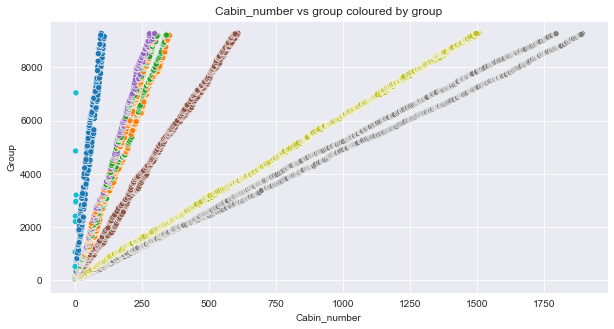

In [321]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data["Cabin_number"], y=data["Group"], c=LabelEncoder().fit_transform(data.loc[~data["Cabin_number"].isna(), "Cabin_deck"]), cmap="tab10")
plt.title("Cabin_number vs group coloured by group");

There is an interesting pattern here. The `Cabin_number` and `Group` (number of groups) features share a linear relationship on a deck by deck basis. So, we can extrapolate missing cabin numbers using linear regression on a deck by deck basis to get an approximate `Cabin_number`.

In [322]:
cn_before = data["Cabin_number"].isna().sum()

# Extrapolate linear relationship on a deck by deck basis.
decks = list(data.Cabin_deck.unique()[:-1])
for deck in decks:
    # Features and labels.
    X_cn = data.loc[~(data["Cabin_number"].isna()) & (data["Cabin_deck"] == deck), "Group"]
    y_cn = data.loc[~(data["Cabin_number"].isna()) & (data["Cabin_deck"] == deck), "Cabin_number"]
    X_test_cn = data.loc[(data["Cabin_number"].isna()) & (data["Cabin_deck"] == deck), "Group"]

    # Linear regression.
    model_cn = LinearRegression()
    model_cn.fit(X_cn.values.reshape(-1, 1), y_cn)
    preds_cn = model_cn.predict(X_test_cn.values.reshape(-1, 1))

    # Fill missing values with predictions.
    data.loc[(data["Cabin_number"].isna()) & (data["Cabin_deck"] == deck), "Cabin_number"] = preds_cn.astype(int)

print("Cabin_number missing values before:", cn_before)
print("Cabin_number missing values after:", data["Cabin_number"].isna().sum())

Cabin_number missing values before: 305
Cabin_number missing values after: 0


Let's update the cabin regions with the new data.

In [323]:
# One-hot encode cabin regions.
data["Cabin_region1"] = (data["Cabin_number"] < 300).astype(int)
data["Cabin_region2"] = ((data["Cabin_number"] >= 300) & (data["Cabin_number"] < 600)).astype(int)
data["Cabin_region3"] = ((data["Cabin_number"] >= 600) & (data["Cabin_number"] < 900)).astype(int)
data["Cabin_region4"] = ((data["Cabin_number"] >= 900) & (data["Cabin_number"] < 1200)).astype(int)
data["Cabin_region5"] = ((data["Cabin_number"] >= 1200) & (data["Cabin_number"] < 1500)).astype(int)
data["Cabin_region6"] = ((data["Cabin_number"] >= 1500) & (data["Cabin_number"] < 1800)).astype(int)
data["Cabin_region7"] = (data["Cabin_number"] >= 1800).astype(int)

`VIP` feature.

In [324]:
data["VIP"].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [325]:
# Missing values before.
v_before = data["VIP"].isna().sum()

# Fill missing values with mode.
data.loc[data["VIP"].isna(), "VIP"] = False

print("VIP missing values before:", v_before)
print("VIP missing values after:", data["VIP"].isna().sum())

VIP missing values before: 296
VIP missing values after: 0


`Age` feature.

`Age` varies across many features like `HomePlanet`, `Group_size`, `Expenditure` and `Cabin_deck`, so we will impute missing values according to the median of these subgroups.

In [326]:
data.groupby(["HomePlanet", "No_spending", "Solo", "Cabin_deck"])["Age"].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [327]:
# Missing values before.
a_before = data[amenities].isna().sum().sum()

# Fill missing values using the median.
na_rows_a = data.loc[data["Age"].isna(), "Age"].index
data.loc[data["Age"].isna(), "Age"] = data.groupby(["HomePlanet", "No_spending", "Solo", "Cabin_deck"])["Age"].transform(lambda x: x.fillna(x.median()))[na_rows_a]

print("Age missing values before:", a_before)
print("Age missing values after:", data["Age"].isna().sum())

Age missing values before: 1410
Age missing values after: 0


In [328]:
# Update age group feature.
data.loc[data["Age"] < 13, "Age_group"] = "Age_0-12"
data.loc[(data["Age"] >= 13) & (data["Age"] <= 17), "Age_group"] = "Age_13-17"
data.loc[(data["Age"] >= 18) & (data["Age"] <= 25), "Age_group"] = "Age_18-25"
data.loc[(data["Age"] >= 26) & (data["Age"] <= 30), "Age_group"] = "Age_26-30"
data.loc[(data["Age"] >= 31) & (data["Age"] <= 50), "Age_group"] = "Age_31-50"
data.loc[(data["Age"]) >= 51, "Age_group"] = "Age_51+"

`CryoSleep` feature.

The best way to predict if a passenger is in `CryoSleep` or not is to see if he spent anything.

In [329]:
data.groupby(["No_spending", "CryoSleep"])["CryoSleep"].size().unstack().fillna(0)

CryoSleep,False,True
No_spending,,
0,7339.0,0.0
1,740.0,4581.0


In [330]:
csl_before = data["CryoSleep"].isna().sum()

# Fill missing values using the mode.
na_rows_csl = data.loc[data["CryoSleep"].isna(), "CryoSleep"].index
data.loc[data["CryoSleep"].isna(), "CryoSleep"] = data.groupby(["No_spending"])["CryoSleep"].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_csl]

print("CryoSleep missing values before:", csl_before)
print("CryoSleep missing values after:", data["CryoSleep"].isna().sum())

CryoSleep missing values before: 310
CryoSleep missing values after: 0


`Expenditure` and `CryoSleep` features.

Let's explore the interaction of these two features. We don't expect people in cryosleep to be able to spend anything.

In [331]:
print("Maximum expenditure of passengers in CryoSleep:", data.loc[data["CryoSleep"] == True, amenities].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [332]:
e_before = data[amenities].isna().sum().sum()

# CryoSleep has no expenditure.
for var_name in amenities:
    data.loc[(data[var_name].isna()) & (data["CryoSleep"] == True), var_name] = 0

print("Expenditure missing values before:", e_before)
print("Expenditure missing values after:", data[amenities].isna().sum().sum())

Expenditure missing values before: 1410
Expenditure missing values after: 866


`Expenditure` and other features.

`Expenditure` varies across many features, but we will only impute missing values using `HomePlanet`, `Solo` and `Age` features to prevent overfitting. We will also use the mean instead of the median because a large proportion of passengers don't spend anything, and median usually comes out as 0.

In [333]:
data.groupby(["HomePlanet", "Solo", "Age_group"])["Expenditure"].mean().unstack().fillna(0)

Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   724.902222   789.700555   841.093596   736.655773   
           1          0.0   693.014898   779.395942   795.420690   794.818627   
Europa     0          0.0  1153.160256  2652.013298  3534.668246  3975.774005   
           1          0.0     0.000000  2489.888889  3806.000000  3949.939929   
Mars       0          0.0  1176.839286  1161.808333  1247.098361  1143.671916   
           1          0.0  1687.261538  1075.341146  1107.122677  1110.392045   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [334]:
e_before = data[amenities].isna().sum().sum()

# Fill remaining missing values using the median.
for var_name in amenities:
    na_rows = data.loc[data[var_name].isna(), var_name].index
    data.loc[data[var_name].isna(), var_name] = data.groupby(["HomePlanet", "Solo", "Age_group"])[var_name].transform(lambda x: x.fillna(x.mean()))[na_rows]

print("Expenditure missing values before:", e_before)
print("Expenditure missing values after:", data[amenities].isna().sum().sum())

Expenditure missing values before: 866
Expenditure missing values after: 0


In [335]:
# Update Expenditure and No_spending.
data["Expenditure"] = data[amenities].sum(axis=1)
data["No_spending"] = (data["Expenditure"] == 0).astype(int)

In [336]:
print(f"{color.RED}Missing values{color.END}: \n")
data.isna().sum()

Missing values: 



PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

## Preprocessing

In [346]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Split data back into train and test samples.

In [338]:
X = data[data["PassengerId"].isin(train["PassengerId"].values)].copy()
X_test = data[data["PassengerId"].isin(test["PassengerId"].values)].copy()

Drop unwanted features (qualitative, redundant, collinear, high cardinality).

In [339]:
X.drop(["PassengerId", "Group", "Group_size", "Age_group", "Cabin_number"], axis=1, inplace=True)
X_test.drop(["PassengerId", "Group", "Group_size", "Age_group", "Cabin_number"], axis=1, inplace=True)

Logarithm transformation

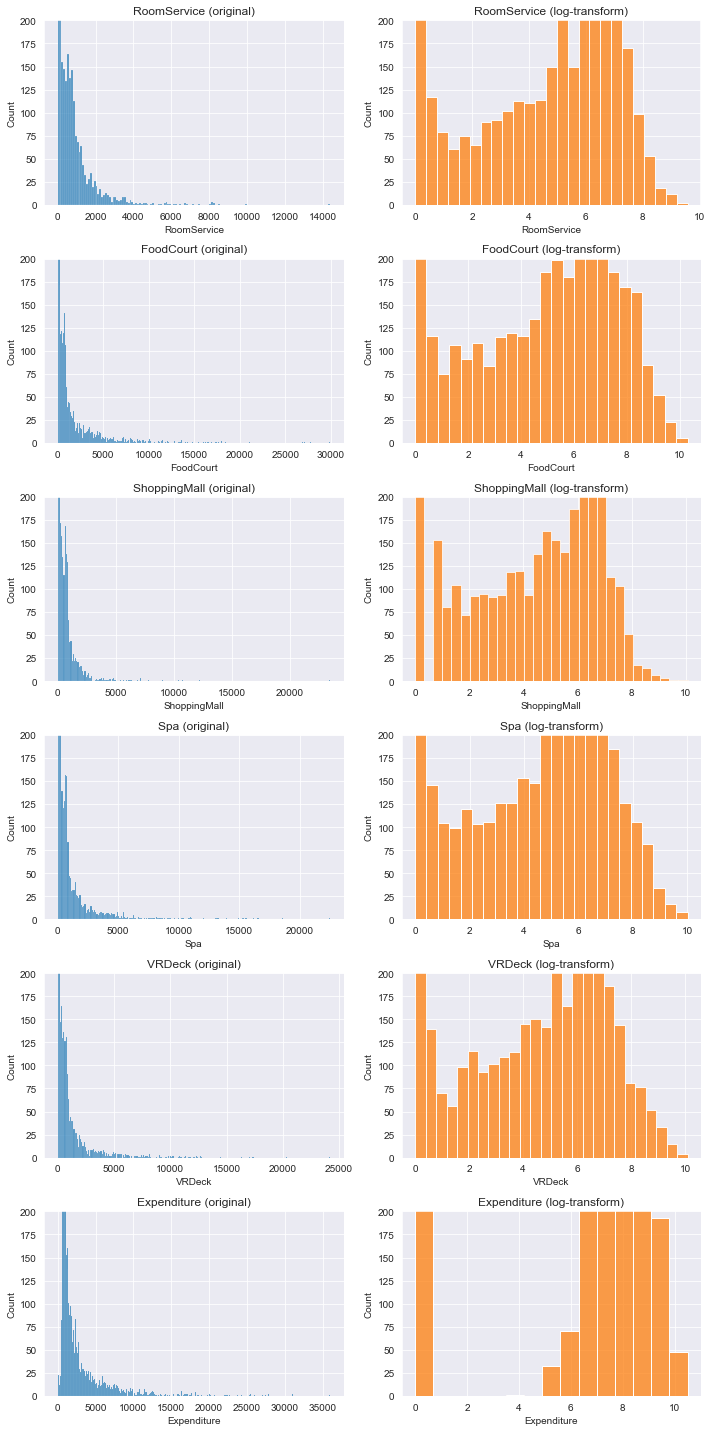

In [340]:
fig = plt.figure(figsize=(10, 20))

for i, var_name in enumerate(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Expenditure"]):
    plt.subplot(6, 2, 2 * i + 1)
    sns.histplot(X[var_name], binwidth=100)
    plt.ylim([0, 200])
    plt.title(f"{var_name} (original)")

    plt.subplot(6, 2, 2 * i + 2)
    sns.histplot(np.log(1 + X[var_name]), color="C1")
    plt.ylim([0, 200])
    plt.title(F"{var_name} (log-transform)")

fig.tight_layout()
plt.show()

In [341]:
for var_name in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Expenditure"]:
    X[var_name] = np.log(1 + X[var_name])
    X_test[var_name] = np.log(1 + X_test[var_name])

Encoding and scaling

In [342]:
# Identify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ["int64", "float64"]]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean = 0 and variance = 1
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse=False))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)],
        remainder="passthrough")

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

print("Training set shape:", X.shape)

Training set shape: (8693, 36)


PCA

In [343]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y, size=0.1 * np.ones(len(X)), opacity=1,
    title=f"Total explained variance: {total_var:.2f}%",
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
    width=800, height=500
)
fig.show()

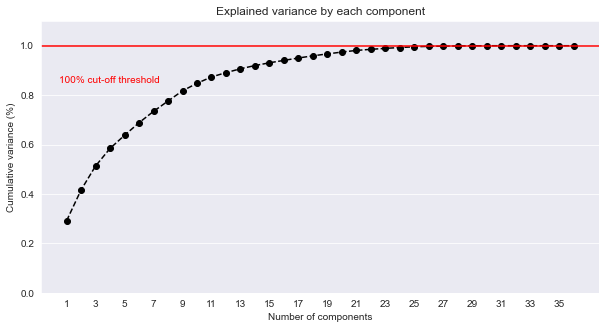

In [344]:
pca = PCA().fit(X)
fig, ax = plt.subplots(figsize=(10, 5))
x_i = np.arange(1, 1 + X.shape[1], step=1)
y_i = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x_i, y_i, marker="o", linestyle="--", color="black")

plt.ylim(0.0, 1.1)
plt.xlabel("Number of components")
plt.xticks(np.arange(1, 1 + X.shape[1], step=2))
plt.ylabel("Cumulative variance (%)")
plt.title("Explained variance by each component")
plt.axhline(y=1, color="r", linestyle="-")
plt.text(0.5, 0.85, "100% cut-off threshold", color="red")
ax.grid(axis="x")

In [347]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

## Model selection

In [350]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
classifiers = {
    "LogisticRegression": Log
}